In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
emotion_raw = pd.read_csv("../data/raw/emotion_raw.csv")
emotion_raw.head()
emotion_raw.info()
emotion_raw.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


,Unnamed: 0,text,label
count,416809.000000,416809,416809.000000
unique,NaN,393822,NaN
top,NaN,i feel more adventurous willing to take risks,NaN
freq,NaN,16,NaN
mean,208404.000000,NaN,1.554271
std,120322.538513,NaN,1.490453
min,0.000000,NaN,0.000000
25%,104202.000000,NaN,0.000000
50%,208404.000000,NaN,1.000000
75%,312606.000000,NaN,3.000000


In [3]:
emotion_raw.isna().sum()
emotion_raw["label"].value_counts()


label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

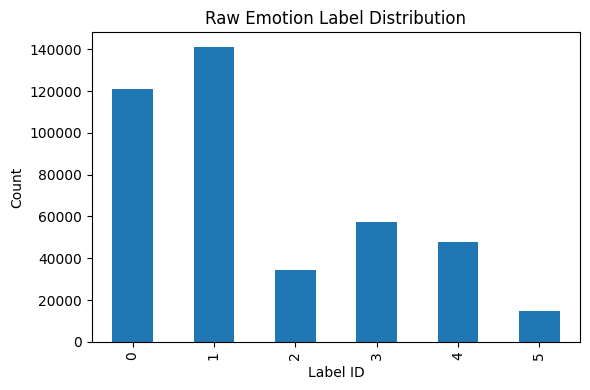

In [4]:
plt.figure(figsize=(6,4))
emotion_raw["label"].value_counts().sort_index().plot(kind="bar")
plt.title("Raw Emotion Label Distribution")
plt.xlabel("Label ID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [5]:
songs_raw = pd.read_csv("../data/raw/songs_raw.csv")
songs_raw.head()
songs_raw.info()
songs_raw.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Artist      799 non-null    object
 2   Album       799 non-null    object
 3   Popularity  799 non-null    int64 
 4   Lyrics      799 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.3+ KB


,Name,Artist,Album,Popularity,Lyrics
count,799,799,799,799.000000,799
unique,659,436,590,NaN,615
top,Daylight,Eminem,One Thing At A Time,NaN,Lyrics not found
freq,5,49,10,NaN,23
mean,NaN,NaN,NaN,68.827284,NaN
std,NaN,NaN,NaN,22.533744,NaN
min,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,60.000000,NaN
50%,NaN,NaN,NaN,74.000000,NaN
75%,NaN,NaN,NaN,85.000000,NaN


In [6]:
songs_raw.isna().sum()

Name          0
Artist        0
Album         0
Popularity    0
Lyrics        0
dtype: int64

In [7]:
songs_raw["Lyrics"].iloc[0]


'8 ContributorsDiscographie 2021 — Pop & Rock LyricsCalendrier 2021JANFÉVMARAVRMAIJUNJULAOÛSEPOCTNOVDÉCJanvier\n— 01/01 : FOURBI - Fragments EP\n— 01/01 : Anna Pest - Dark Arms Reach Skyward With Bone White Fingers\n* 04/01 : FÉLIXE - Remixs\n* 08/01 : Firas Nassri - La Levantine\n* 08/01 : Treecy McNeil - Graffiti\n— 08/01 : Willows - The Hills\n* 08/01 : Arielle - Arielle\n* 14/01 : Joël Martel et les Pépites d\'or - Le froid\n* 15/01 : Arsenaut-Langevin - L\'autre\n— 15/01 : Eadsé - My Good Friend\n* 15/01 : Silverdogz - Redemption\n* 15/01 : Lavabo - Lavabotomie!\n* 15/01 : Chutombébas - Chutombébas\n* 15/01 : André Varin - Le temps d\'une autre chanson\n* 15/01 : Beneath the Temple - Deathless Supremacy\n* 16/01 : SILK - Dawn\n* 17/01 : Controlled Process - Silence and Isolation\n* 22/01 : Holy Data - Goodbye World Alive\n— 22/01 : Vanille - Soleil \'96\n* 22/01 : Calendes - Grand manège\n* 22/01 : Alex Burger - Sweet Montérégie\n— 22/01 : Oli Laroche - Les héritiers du grand merd

In [8]:
songs_raw["Artist"].nunique()


436

In [9]:
songs_raw["Artist"].value_counts().head(10)


Artist
Eminem           49
Morgan Wallen    15
Ed Sheeran       15
Taylor Swift     14
The Weeknd       14
David Guetta     10
Sam Smith        10
Lewis Capaldi     8
Harry Styles      8
Luke Combs        6
Name: count, dtype: int64

In [10]:
songs_raw["Lyrics"] = songs_raw["Lyrics"].astype(str)
songs_raw["raw_lyrics_length"] = songs_raw["Lyrics"].str.len()
songs_raw["raw_lyrics_length"].describe()


count       799.000000
mean       6777.207760
std       37810.797307
min          16.000000
25%        1511.000000
50%        1926.000000
75%        2717.000000
max      605267.000000
Name: raw_lyrics_length, dtype: float64

In [11]:
# Drop useless index column
emotion_raw = emotion_raw.drop(columns=["Unnamed: 0"])

emotion_raw.isna().sum()
emotion_raw["label"].value_counts().sort_index()


label
0    121187
1    141067
2     34554
3     57317
4     47712
5     14972
Name: count, dtype: int64

In [12]:
songs_raw["Lyrics"] = songs_raw["Lyrics"].astype(str)

# Count 'Lyrics not found'
songs_raw["Lyrics_not_found"] = songs_raw["Lyrics"].str.contains("Lyrics not found", case=False)
songs_raw["Lyrics_not_found"].sum()

# Show some of the longest lyrics to confirm the noise
songs_raw["raw_lyrics_length"] = songs_raw["Lyrics"].str.len()
songs_raw.sort_values("raw_lyrics_length", ascending=False).head(3)[
    ["Name", "Artist", "raw_lyrics_length", "Lyrics"]
]


,Name,Artist,raw_lyrics_length,Lyrics
28,Waterloo Sunset - Mono Version,The Kinks,605267,2 ContributorsA Visit from Albertine (Chapter ...
433,Queen of Belle la Vie,The Band That Saved The World,527121,"2 ContributorsArabian Nights,Vol. 2 (Chap. 3) ..."
145,A Design for Life - Remastered,Manic Street Preachers,527121,"2 ContributorsArabian Nights,Vol. 2 (Chap. 3) ..."
